# IMPORTING PACKAGES

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

df=pd.read_csv(r"train_data.csv")
df1=pd.read_csv(r"test_data.csv")

# READING THE DATA

In [3]:
train_original=df.copy()
test_original=df1.copy()

In [4]:
df.head(10)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0
5,5100411,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-13251,-3839,1,1,0,0,Accountants,2.0,-1.0,0
6,5022817,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-17262,-1617,1,0,0,0,Core staff,2.0,-16.0,0
7,5009811,F,N,N,1,202500.0,Working,Secondary / secondary special,Married,House / apartment,-11813,-3266,1,1,1,0,Sales staff,3.0,-21.0,0
8,5113922,F,N,N,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,Municipal apartment,-23478,365243,1,0,0,0,NaN,1.0,-50.0,0
9,5021541,F,Y,N,1,306000.0,Working,Higher education,Married,House / apartment,-9310,-1678,1,0,0,0,NaN,3.0,-13.0,0


In [5]:
df.shape

(29165, 20)

In [6]:
df1.shape

(7292, 20)

In [7]:
#GET SOME STATISTICS

In [8]:
df.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [10]:
#COUNT THE EMPTY VALUES IN EACH COLUMNS

df.isnull().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

Test Dataset info

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

In [12]:
#COUNT THE EMPTY VALUES IN EACH COLUMNS

df1.isnull().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              2296
Family member count       0
Account age               0
Is high risk              0
dtype: int64

# EXPLORING AND PREPARING THE DATA

In [13]:
data=[df,df1]
for dataset in data:
    #FILTER CATEGORICAL VARIABLES
    categorical_columns=[x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    #EXCLUDE ID COLS AND SOURCE:
    categorical_columns =[x for x in categorical_columns if x not in['ID']]


    #PRINT FREQUENCY OF CATEGORIES
for col in categorical_columns:
    print('\nFrequency of categories for variable %s'%col)
    print(df[col].value_counts())




Frequency of categories for variable Gender
Gender
F    19549
M     9616
Name: count, dtype: int64

Frequency of categories for variable Has a car
Has a car
N    18128
Y    11037
Name: count, dtype: int64

Frequency of categories for variable Has a property
Has a property
Y    19557
N     9608
Name: count, dtype: int64

Frequency of categories for variable Employment status
Employment status
Working                 15056
Commercial associate     6801
Pensioner                4920
State servant            2381
Student                     7
Name: count, dtype: int64

Frequency of categories for variable Education level
Education level
Secondary / secondary special    19803
Higher education                  7910
Incomplete higher                 1129
Lower secondary                    298
Academic degree                     25
Name: count, dtype: int64

Frequency of categories for variable Marital status
Marital status
Married                 20044
Single / not married     3864
Civil mar

In [14]:
pd.crosstab(df['Gender'], df['Is high risk'], margins=True)


Is high risk,0,1,All
Gender,,,
F,19243,306,19549
M,9423,193,9616
All,28666,499,29165


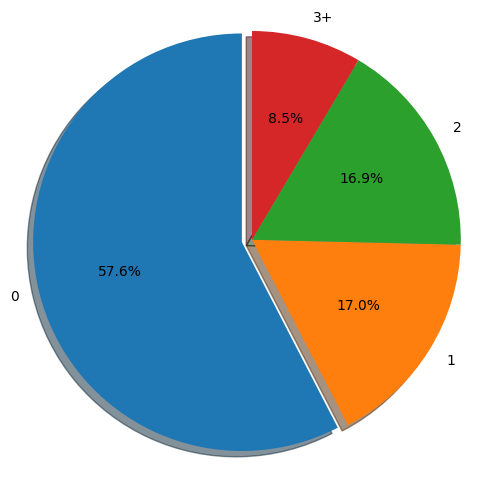

In [15]:
#DEPENDENDANTS

plt.figure(figsize=(6,6))
labels=['0','1','2','3+']
explode=(0.05,0,0,0)
size=[345,102,101,51]
plt.pie(size,explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [16]:
pd.crosstab(df['Dwelling'], df['Is high risk'], margins=True)

#pd.crosstab(df.Dependents,df.Loan_Status,margins=True)

Is high risk,0,1,All
Dwelling,,,
Co-op apartment,125,2,127
House / apartment,25622,437,26059
Municipal apartment,888,24,912
Office apartment,202,6,208
Rented apartment,445,8,453
With parents,1384,22,1406
All,28666,499,29165


In [17]:
pd.crosstab(df['Has a property'], df['Is high risk'], margins=True)


Is high risk,0,1,All
Has a property,,,
N,9398,210,9608
Y,19268,289,19557
All,28666,499,29165


<Axes: xlabel='count', ylabel='Employment status'>

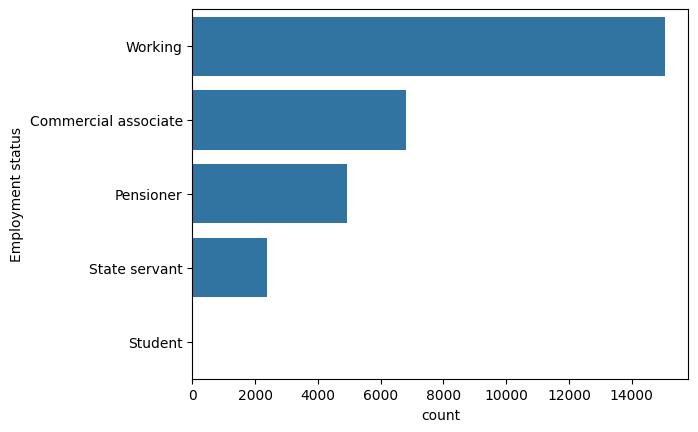

In [18]:
#SELF EMPLOYED

sns.countplot(df['Employment status'])

In [19]:
#pd.crosstab(df.Self_Employed, df.Loan_Status, margins=True)

<Axes: xlabel='count', ylabel='Education level'>

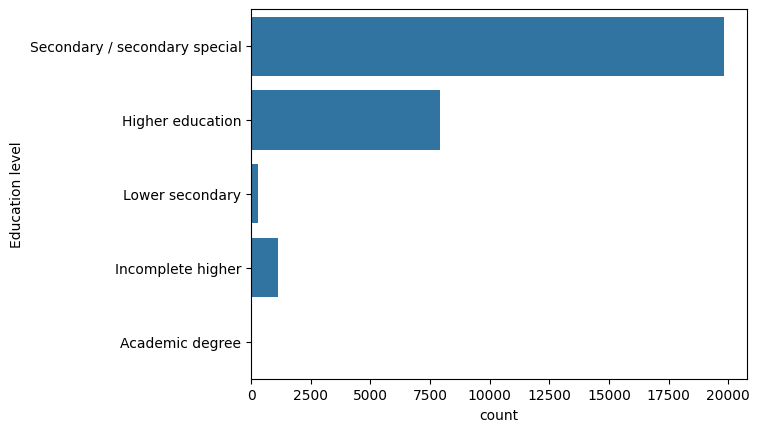

In [20]:
#EDUCATION

sns.countplot(df['Education level'])

In [21]:
#PROPERTY AREA


#sns.countplot(df.Property_Area)

In [22]:
temp1=df['Has a car'].value_counts(ascending=True)
temp2=df.pivot_table(values='Is high risk',index=['Has a car'],aggfunc= lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)
print('\n probability of getting loan for each credit history class:')
print(temp2)

Frequency Table for Credit History:
Has a car
Y    11037
N    18128
Name: count, dtype: int64

 probability of getting loan for each credit history class:
Empty DataFrame
Columns: []
Index: []


<Axes: xlabel='Family member count'>

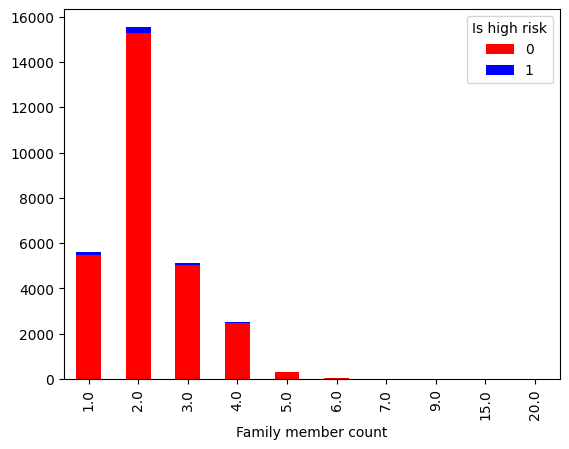

In [23]:
temp3=pd.crosstab(df['Family member count'],df['Is high risk'])
temp3.plot(kind='bar',stacked=True, color=['red','blue'],grid=False)

In [24]:
df.apply(lambda x: sum(x.isnull()),axis=0)

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

# CORRELATION BETWEEN ALL THE NUMERICAL VARIABLES


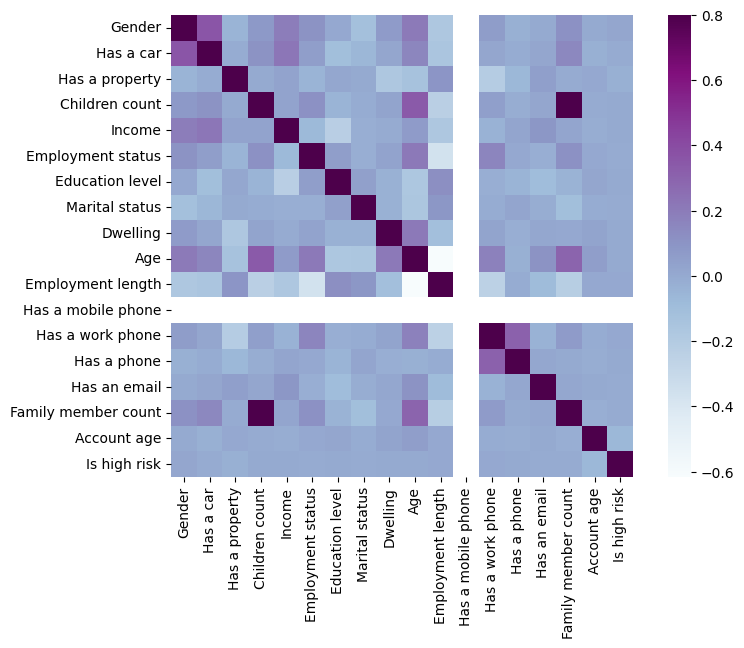

In [44]:
# HEATMAP REPRESENTATION OF THE CORRELATION

df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop columns with all NaN values (if any)
df_numeric = df_numeric.dropna(axis=1, how='all')

# Calculate the correlation matrix
matrix = df_numeric.corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu")
plt.show()

In [28]:
#COUNT THE EMPTY VALUES IN EACH COLUMNS

df.isnull().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

# Checking correlation with class data

In [29]:
pd.crosstab(df['Employment status'], df['Is high risk'], margins=True)

Is high risk,0,1,All
Employment status,,,
Commercial associate,6687,114,6801
Pensioner,4817,103,4920
State servant,2353,28,2381
Student,7,0,7
Working,14802,254,15056
All,28666,499,29165


In [30]:
pd.crosstab(df['Education level'], df['Is high risk'], margins=True)

Is high risk,0,1,All
Education level,,,
Academic degree,25,0,25
Higher education,7775,135,7910
Incomplete higher,1105,24,1129
Lower secondary,289,9,298
Secondary / secondary special,19472,331,19803
All,28666,499,29165


In [31]:
pd.crosstab(df['Dwelling'], df['Is high risk'], margins=True)

Is high risk,0,1,All
Dwelling,,,
Co-op apartment,125,2,127
House / apartment,25622,437,26059
Municipal apartment,888,24,912
Office apartment,202,6,208
Rented apartment,445,8,453
With parents,1384,22,1406
All,28666,499,29165


In [32]:
pd.crosstab(df['Marital status'], df['Is high risk'], margins=True)

Is high risk,0,1,All
Marital status,,,
Civil marriage,2278,34,2312
Married,19724,320,20044
Separated,1688,24,1712
Single / not married,3777,87,3864
Widow,1199,34,1233
All,28666,499,29165


In [33]:
pd.crosstab(df['Dwelling'], df['Is high risk'], margins=True)

Is high risk,0,1,All
Dwelling,,,
Co-op apartment,125,2,127
House / apartment,25622,437,26059
Municipal apartment,888,24,912
Office apartment,202,6,208
Rented apartment,445,8,453
With parents,1384,22,1406
All,28666,499,29165


# Categorical Variable Mapping for Feature Engineering

In [34]:
#CONVERTING STRING VALUES(CATEGORICAL VALUES) TO INTEGER
df.Gender=df.Gender.map({"F":0,"M":1})
df['Marital status'] = df['Marital status'].map({"Single / not married":0, "Married":1, "Civil marriage":2, "Widow":3, "Separated":4})
df['Has a car']=df['Has a car'].map({"N":0,"Y":1})
df['Has a property']=df['Has a property'].map({"N":0,"Y":1})
df['Employment status']=df['Employment status'].map({"Commercial associate":0,"Pensioner":1,"State servant":2,"Student":3,"Working":4})
df['Education level']=df['Education level'].map({"Academic degree":0,"Higher education":1,"Incomplete higher":2,"Lower secondary":3,"Secondary / secondary special":4})
df['Dwelling']=df['Dwelling'].map({"Co-op apartment":0,"House / apartment":1,"Municipal apartment":2,"Office apartment":3,"Rented apartment":4,"With parents":5})

In [35]:
df1.Gender=df1.Gender.map({"F":0,"M":1})
df1['Marital status'] = df1['Marital status'].map({"Single / not married":0, "Married":1, "Civil marriage":2, "Widow":3, "Separated":4})
df1['Has a car']=df1['Has a car'].map({"N":0,"Y":1})
df1['Has a property']=df1['Has a property'].map({"N":0,"Y":1})
df1['Employment status']=df1['Employment status'].map({"Commercial associate":0,"Pensioner":1,"State servant":2,"Student":3,"Working":4})
df1['Education level']=df1['Education level'].map({"Academic degree":0,"Higher education":1,"Incomplete higher":2,"Lower secondary":3,"Secondary / secondary special":4})
df1['Dwelling']=df1['Dwelling'].map({"Co-op apartment":0,"House / apartment":1,"Municipal apartment":2,"Office apartment":3,"Rented apartment":4,"With parents":5})

In [36]:
df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,1,1,1,0,135000.0,4,4,1,5,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,0,1,0,1,135000.0,0,1,0,1,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,0,0,1,2,180000.0,0,4,1,1,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,0,1,1,0,360000.0,0,1,0,1,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,0,0,0,0,270000.0,4,4,4,1,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


# Drop Column


In [37]:
df.drop(columns=['ID'], inplace=True)
df.drop(columns=['Job title'], inplace=True)

In [38]:
df1.drop(columns=['ID'], inplace=True)
df1.drop(columns=['Job title'], inplace=True)

In [39]:
df1.isnull().sum()

Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

In [40]:
df.isnull().sum()

Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

# Check feature types

In [41]:
df1.dtypes

Gender                   int64
Has a car                int64
Has a property           int64
Children count           int64
Income                 float64
Employment status        int64
Education level          int64
Marital status           int64
Dwelling                 int64
Age                      int64
Employment length        int64
Has a mobile phone       int64
Has a work phone         int64
Has a phone              int64
Has an email             int64
Family member count    float64
Account age            float64
Is high risk             int64
dtype: object

In [42]:
#LOOK AT THE DATA TYPES

df.dtypes

Gender                   int64
Has a car                int64
Has a property           int64
Children count           int64
Income                 float64
Employment status        int64
Education level          int64
Marital status           int64
Dwelling                 int64
Age                      int64
Employment length        int64
Has a mobile phone       int64
Has a work phone         int64
Has a phone              int64
Has an email             int64
Family member count    float64
Account age            float64
Is high risk             int64
dtype: object

#  Model devlopment & evaluation




In [46]:
#LETS PREPARE THE DATA FOR FEEDING IN TO THE MODELS
#SAVE THE TARGET VARIABLE IN SEPARATE

x = df.drop("Is high risk", axis=1)
y = df['Is high risk']

In [48]:
xtest=df1.drop("Is high risk",axis=1)
ytest=df1['Is high risk']

In [49]:
x=pd.get_dummies(x)
df=pd.get_dummies(df)

Random forest Normal

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate Random Forest Classifier
rfc = RandomForestClassifier()

# Fit the classifier on the training data
rfc.fit(x, y)

# Make predictions on the test data
pred_rfc = rfc.predict(xtest)

# Calculate accuracy
acc_rfc = accuracy_score(ytest, pred_rfc) * 100
print("Accuracy:", acc_rfc)

# Generate confusion matrix
cm = confusion_matrix(ytest, pred_rfc)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(ytest, pred_rfc)
print("Classification Report:")
print(report)


Accuracy: 98.21722435545803
Confusion Matrix:
[[7147   28]
 [ 102   15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7175
           1       0.35      0.13      0.19       117

    accuracy                           0.98      7292
   macro avg       0.67      0.56      0.59      7292
weighted avg       0.98      0.98      0.98      7292



Gradiant Boosting Normal

In [51]:
#USE GRADIENT BOOSTING CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier
gbk=GradientBoostingClassifier()
gbk.fit(x,y)
pred_gbc=gbk.predict(xtest)
acc_gbc=accuracy_score(ytest,pred_gbc)*100
acc_gbc



98.36807460230389

In [52]:

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(ytest, pred_gbc)

In [53]:
cm

array([[7170,    5],
       [ 114,    3]])

In [54]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(ytest, pred_gbc)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7175
           1       0.38      0.03      0.05       117

    accuracy                           0.98      7292
   macro avg       0.68      0.51      0.52      7292
weighted avg       0.97      0.98      0.98      7292



KNeighborsClassifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate KNN Classifier
knn_classifier = KNeighborsClassifier()

# Fit the classifier on the training data
knn_classifier.fit(x, y)

# Make predictions on the test data
pred_knn = knn_classifier.predict(xtest)

# Calculate accuracy
acc_knn = accuracy_score(ytest, pred_knn) * 100
print("Accuracy:", acc_knn)

# Generate confusion matrix
cm = confusion_matrix(ytest, pred_knn)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(ytest, pred_knn)
print("Classification Report:")
print(report)


Accuracy: 98.24465167306637
Confusion Matrix:
[[7152   23]
 [ 105   12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7175
           1       0.34      0.10      0.16       117

    accuracy                           0.98      7292
   macro avg       0.66      0.55      0.57      7292
weighted avg       0.98      0.98      0.98      7292



Decision tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier on the training data
dt_classifier.fit(x, y)

# Make predictions on the test data
pred_dt = dt_classifier.predict(xtest)

# Calculate accuracy
acc_dt = accuracy_score(ytest, pred_dt) * 100
print("Accuracy:", acc_dt)

# Generate confusion matrix
cm = confusion_matrix(ytest, pred_dt)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(ytest, pred_dt)
print("Classification Report:")
print(report)


Accuracy: 97.14755896873287
Confusion Matrix:
[[7063  112]
 [  96   21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7175
           1       0.16      0.18      0.17       117

    accuracy                           0.97      7292
   macro avg       0.57      0.58      0.58      7292
weighted avg       0.97      0.97      0.97      7292



Oversampling

In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate SMOTE
smote = SMOTE()

# Oversample the minority class
x_resampled, y_resampled = smote.fit_resample(x, y)

# Instantiate Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier on the resampled data
dt_classifier.fit(x_resampled, y_resampled)

# Make predictions on the test data
pred_dt = dt_classifier.predict(xtest)

# Calculate accuracy
acc_dt = accuracy_score(ytest, pred_dt) * 100
print("Accuracy:", acc_dt)

# Generate confusion matrix
cm = confusion_matrix(ytest, pred_dt)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(ytest, pred_dt)
print("Classification Report:")
print(report)


Accuracy: 95.91332967635765
Confusion Matrix:
[[6967  208]
 [  90   27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7175
           1       0.11      0.23      0.15       117

    accuracy                           0.96      7292
   macro avg       0.55      0.60      0.57      7292
weighted avg       0.97      0.96      0.97      7292



Oversampling with random forest

In [58]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate SMOTE
smote = SMOTE()

# Oversample the minority class
x_resampled, y_resampled = smote.fit_resample(x, y)

# Instantiate Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on the resampled data
rf_classifier.fit(x_resampled, y_resampled)

# Make predictions on the test data
pred_rf = rf_classifier.predict(xtest)

# Calculate accuracy
acc_rf = accuracy_score(ytest, pred_rf) * 100
print("Accuracy:", acc_rf)

# Generate confusion matrix
cm = confusion_matrix(ytest, pred_rf)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(ytest, pred_rf)
print("Classification Report:")
print(report)


Accuracy: 97.68239166209544
Confusion Matrix:
[[7098   77]
 [  92   25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7175
           1       0.25      0.21      0.23       117

    accuracy                           0.98      7292
   macro avg       0.62      0.60      0.61      7292
weighted avg       0.98      0.98      0.98      7292



Decision tree

In [59]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate SMOTE
smote = SMOTE()

# Oversample the minority class
x_resampled, y_resampled = smote.fit_resample(x, y)

# Instantiate Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier on the resampled data
dt_classifier.fit(x_resampled, y_resampled)

# Make predictions on the test data
pred_dt = dt_classifier.predict(xtest)

# Calculate accuracy
acc_dt = accuracy_score(ytest, pred_dt) * 100
print("Accuracy:", acc_dt)

# Generate confusion matrix
cm = confusion_matrix(ytest, pred_dt)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(ytest, pred_dt)
print("Classification Report:")
print(report)


Accuracy: 95.87218869994516
Confusion Matrix:
[[6964  211]
 [  90   27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7175
           1       0.11      0.23      0.15       117

    accuracy                           0.96      7292
   macro avg       0.55      0.60      0.57      7292
weighted avg       0.97      0.96      0.97      7292



KNN

In [60]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate SMOTE
smote = SMOTE()

# Oversample the minority class
x_resampled, y_resampled = smote.fit_resample(x, y)

# Instantiate KNN Classifier
knn_classifier = KNeighborsClassifier()

# Fit the classifier on the resampled data
knn_classifier.fit(x_resampled, y_resampled)

# Make predictions on the test data
pred_knn = knn_classifier.predict(xtest)

# Calculate accuracy
acc_knn = accuracy_score(ytest, pred_knn) * 100
print("Accuracy:", acc_knn)

# Generate confusion matrix
cm = confusion_matrix(ytest, pred_knn)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(ytest, pred_knn)
print("Classification Report:")
print(report)


Accuracy: 92.11464618760286
Confusion Matrix:
[[6667  508]
 [  67   50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      7175
           1       0.09      0.43      0.15       117

    accuracy                           0.92      7292
   macro avg       0.54      0.68      0.55      7292
weighted avg       0.98      0.92      0.95      7292



In [61]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate class weights
class_weights = len(y) / (2 * np.bincount(y))

# Instantiate XGBoost Classifier with class weights
xgb_classifier = xgb.XGBClassifier(scale_pos_weight=class_weights[1])

# Fit the classifier on the training data
xgb_classifier.fit(x, y)

# Make predictions on the test data
pred_xgb = xgb_classifier.predict(xtest)

# Calculate accuracy
acc_xgb = accuracy_score(ytest, pred_xgb) * 100
print("Accuracy:", acc_xgb)

# Generate confusion matrix
cm = confusion_matrix(ytest, pred_xgb)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(ytest, pred_xgb)
print("Classification Report:")
print(report)


Accuracy: 96.96928140427866
Confusion Matrix:
[[7037  138]
 [  83   34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7175
           1       0.20      0.29      0.24       117

    accuracy                           0.97      7292
   macro avg       0.59      0.64      0.61      7292
weighted avg       0.98      0.97      0.97      7292



In [63]:
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming x and y are already defined as your features and target variables

# Count the occurrences of each class
class_counts = Counter(y)

# Print the class counts
print("Class counts:", class_counts)

# Instantiate Random Forest Classifier with class weights
rf_classifier = RandomForestClassifier(class_weight={0: class_counts[0], 1: class_counts[1]})

# Fit the classifier on the training data
rf_classifier.fit(x, y)

# Assuming xtest and ytest are your test features and labels
# Make predictions on the test data
pred_rf = rf_classifier.predict(xtest)

# Calculate accuracy
acc_rf = accuracy_score(ytest, pred_rf) * 100
print("Accuracy:", acc_rf)

# Generate confusion matrix
cm = confusion_matrix(ytest, pred_rf)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(ytest, pred_rf)
print("Classification Report:")
print(report)


Class counts: Counter({0: 28666, 1: 499})
Accuracy: 98.20351069665386
Confusion Matrix:
[[7145   30]
 [ 101   16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7175
           1       0.35      0.14      0.20       117

    accuracy                           0.98      7292
   macro avg       0.67      0.57      0.59      7292
weighted avg       0.98      0.98      0.98      7292

